# Regression Models
- Regression is type of model to explain the relationship between independent (input) and dependent (output) variables.
    - If the model utilizes solely a straight line for modeling the relationship, it's called a linear regression
- Linear regression finds the line of best fit between observed inputs and outputs.
- Less noise in the data will result in better forecasts.
- In the most simple case, the model uses a single input, X, to estimate the mean of output Y.
    - $E(Y|X) = b_{0} + b{_1}X$
- Get an estimate of how well of a fit a linear regression model would be by calculating the correlation between X and Y
    - Pearson correlation coefficient r = $\frac{\text{cov}(X,Y)}{\sigma_{X}\sigma_{Y}}$ , $\text{cov} = E[(X - \mu_{X})(Y - \mu_{Y})]$
    - |r| near 1 indicates a linear model would work well
    
### Uses
- Regression be used for predictions
    - What price do you predict a 4000 sqft. house costs?
- Regression be used for prediction intervals

### Coefficients
- Coefficients in the model can be used to see how an incremental increase or decrease in X will affect our model's prediction of Y
- Intercept in the model is measured in units of the output variable Y
- Slope in the model is measure in units of Y/X

### Residuals
- Regression models minimize the sum of squares of the residuals
- Residuals help explain how well the regression models the data.
- If residuals are normally distributed, and have the same standard deviation at all values of X, you can use RMSE to bound your predictions
    - Prediction interval = y +/- 2*RMSE
- Can explore why certain examples in your data may have high outlier residuals in order to further improve the model

### Measures of fit
- R$^{2}$ tells us the proportion of variance in Y that is explained by the model
- RMSE tells us the standard deviation of the residuals

### Fitting curves to data
- Sometimes the relationship between X and Y is not linear
    - You can show this by plotting the linear regression line alongside X and Y
- A common example of a non-linear relationship between inputs and outputs is price's affect on demand for a  product
    - Do a log transform of both inputs and outputs before fitting a regression model to improve performance
    - $E[\text{log(Sales) | Price]} = b_0 + b_1\text{log(Price)}$
    
### Multiple Linear Regression
- Incorporate more than one independent variable into the model
    - Might want to use number of bedrooms along with sqft of house to predict the price of the house
- $E\text{[Y|}X_{1},X_{2}] = b_0 + b_{1}X_{1} + b_{2}X_{2}$
- With two independent variables, the model is a plane instead of a linear as it is with one independent variable

### Logistic Regression
- Linear regression works best when the dependent variable is continuous.
- There's many cases where the dependent variable is discrete, such as 1 or 0
    - Consumer clicks on an ad?
    - Medical drug will be effective on patient?
- These example variables can be represented as Bernoulli random variables, because they can take a value of 1 with probability p, given X
- Output of logistic regression model will be between 0 and 1, estimating p
- Assumes a linear relationship between $X$ and the log-odds of the event $Y=1$
    - $p = \frac{1}{b^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2})}$
    - because $\text{log}_b \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from scipy.stats import shapiro
%matplotlib inline

### Simple linear regression example
- Predict the highway mpg of a car given it's engine displacement in liters

In [2]:
df = pd.read_csv('mpg.csv')

X = df['displ'].values.reshape(-1, 1)
y = df['hwy'].values

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

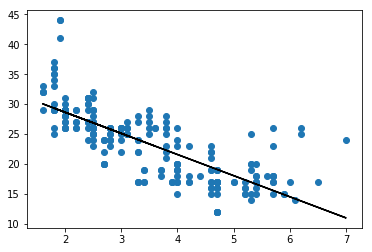

In [3]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'k')
plt.show()

##### Coefficients

In [4]:
print('b0:', lr.intercept_)
print('b1:', lr.coef_[0])

b0: 35.69765105184459
b1: -3.530588806168922


y intercept is 35.7

slope is -3.5

for every increase in liter, expect highway fuel efficieny to drop 3.5 mpg

##### Distribution of residuals

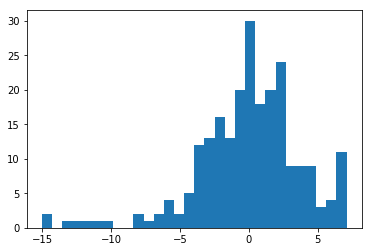

In [5]:
residuals = y_pred - y
plt.hist(residuals, bins=30)
plt.show()

In [6]:
# test null hypothesis that residuals come from a normal distribution
W, p = shapiro(residuals)
print('p-statistics', p)

p-statistics 4.3431207075173006e-08


Residuals appear to not come from a normal distribution

Bounds on predictions using RMSE would not be as reliable

##### Evaluate performance with R$^2$ and RMSE

In [7]:
def calc_r2(y_true, y_pred):
    # calculate residual sum of squares
    u = ((y_true-y_pred)**2).sum()
    # calculate total sum of squares
    v = ((y_true-y_true.mean())**2).sum()
    return 1 - u/v

def calc_rmse(y_true, y_pred):
    return np.sqrt(((y_true-y_pred)**2).sum())
    
r2 = calc_r2(y, y_pred)
rmse = calc_rmse(y, y_pred)
print('r2:', r2, '\nrmse:', rmse)

r2: 0.5867866723989039 
rmse: 58.42798138730678


### Multiple linear regression example
- Predict the highway mpg of a car given it's engine displacement in liters and it's city mpg

In [8]:
#displ is engine displacement in liters
X = df[['displ', 'cty']]
y= df['hwy']

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

##### View coefficients of model

In [9]:
print('b0 (intercept):', lr.intercept_)
print('b1 (weight on x1):', lr.coef_[0])
print('b2 (weight on x2):', lr.coef_[1])

b0 (intercept): 1.1514498533297584
b1 (weight on x1): -0.0343202021862331
b2 (weight on x2): 1.3291362399434556


##### Visualize model as plane alongside the data
Note: Javascript is disabled in Jupyterlab in Unity, so this can't be an interactive plot

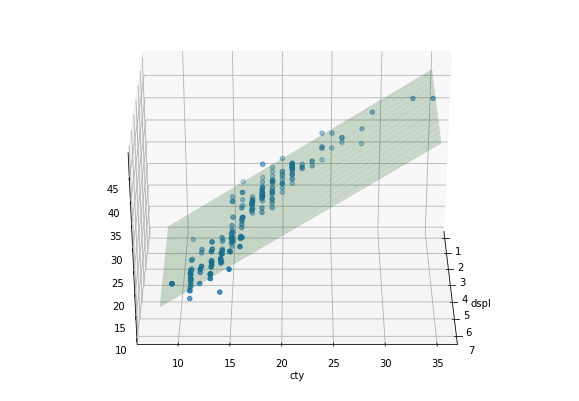

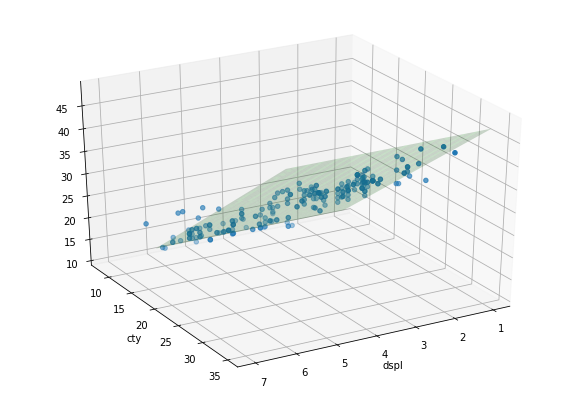

In [10]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['displ'], df['cty'], df['hwy'])

x1= np.arange(1, 7, 1)
x2= np.arange(8, 36, 1)
x1i = np.linspace(x1.min(), x1.max(), 50)
x2i = np.linspace(x2.min(), x2.max(), 50)
x1i, x2i = np.meshgrid(x1i, x2i)
y_ = lr.intercept_ + lr.coef_[0]*x1i + lr.coef_[1]*x2i

ax.plot_surface(x1i, x2i, y_, color='g', alpha=0.2)
plt.xlabel('dspl')
plt.ylabel('cty')
ax.view_init(30, 0)
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['displ'], df['cty'], df['hwy'])
ax.plot_surface(x1i, x2i, y_, color='g', alpha=0.2)
plt.xlabel('dspl')
plt.ylabel('cty')
ax.view_init(30, 60)
plt.show()

### Logistic Regression Example
- Predict whether a breast tumor is malignant or benign given it's cell nuclei area

In [11]:
X, y = load_breast_cancer(return_X_y=True)
# use one feature, area of cell nuclei in tumor
X = X[:, 0].reshape(-1, 1)

model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)

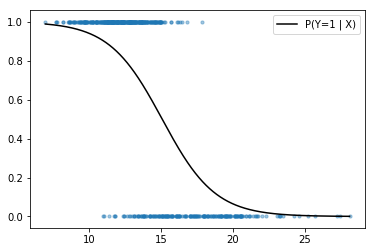

In [12]:
X_linspace = np.linspace(X.min(), X.max(), 10000).reshape(-1, 1)
# retrieve the model's estimate of p, given X
y_model = model.predict_proba(X_linspace)[:,1]

plt.scatter(X, y, s=10, alpha=0.4)
plt.plot(X_linspace, y_model, color='k', label='P(Y=1 | X)')
plt.legend()
plt.show()